This notebook shows a process of nucleation and growth of a somewhat complex crystal structure ($tP30-\text{CrFe}$). Individual particles were identified as being in the fluid or solid phase using [pythia](https://pythia-learn.readthedocs.io).

We use two tricks to be able to clearly see the crystal within the fluid:

- make the fluid-like particles smaller
- use additive rendering to be able to see entirely through the droplet

The color and diameter have already been stored within the file, so it is a simple matter of drawing what is there using additive rendering.

In [1]:
import numpy as np
import gtar

import vispy, vispy.app
vispy.app.use_app('pyglet')
import plato, plato.draw.vispy as draw

import IPython

In [2]:
target = 'crystallization.zip'

gtar.widths['color'] = 4
with gtar.GTAR(target, 'r') as traj:
    (boxRec, posRec, colorRec, diamRec), frames = traj.framesWithRecordsNamed(
        ['box', 'position', 'color', 'diameter'])
    
    box = traj.getRecord(boxRec, frames[-1])

lengthscale = np.max(box[:3])
print(len(frames))

3


In [3]:
prim = draw.Spheres()

# a nice direction to look down, determined by eye
rotation = [-0.25143194, -0.39416865, -0.13934731, -0.8729841 ]
features = dict(ambient_light=0, directional_light=(0, 0, -1), additive_rendering=True)
scene = draw.Scene(prim, size=(lengthscale, lengthscale), zoom=2, rotation=rotation,
                   pixel_scale=400/lengthscale, features=features)

scene.show()

def update(frame=0, color_scale=.125):
    frame = frames[frame]
    with gtar.GTAR(target, 'r') as traj:
        positions = traj.getRecord(posRec, frame)
        box = traj.getRecord(boxRec, frame)
        colors = traj.getRecord(colorRec, frame)
        diameters = traj.getRecord(diamRec, frame)
        
    colors *= color_scale
    
    prim.colors = colors
    prim.diameters = diameters
    prim.positions = positions
    scene.render()
    
update()

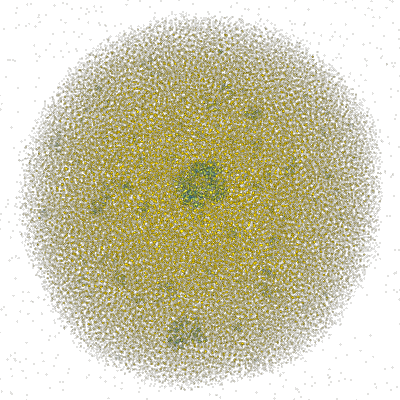

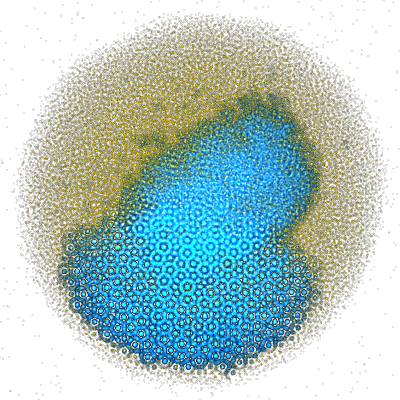

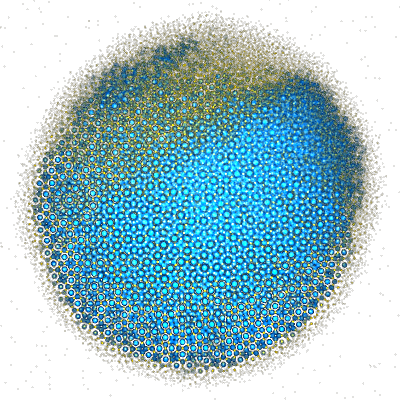

In [4]:
vispy.app.process_events()

for frame in range(len(frames)):
    update(frame)
    image_target = '../gallery/crystallization_vispy_{}.png'.format(frame)
    scene.save(image_target)
    IPython.display.display(IPython.display.Image(filename=image_target))